In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Hitters.csv')
df.head()


,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
print(df["Salary"].isnull().sum())

59


In [ ]:
df = df.drop('Player', axis=1)

print("before dropna():",df.shape)
# Drop any rows the contain missing values. Note that this is not necessarily␣ the recommended practice for a given problem.
df = df.dropna()
# Print the dimensions of the modified Hitters data (263 rows x 20 columns)
print("after dropna():",df.shape)
# One last check: should return 0
print("check the number of missing salary after dropna():",df["Salary"].isnull().sum())


before dropna(): (322, 20)
after dropna(): (263, 20)
check the number of missing salary after dropna(): 0


In [ ]:
df[['League', 'Division', 'NewLeague']].head()

,League,Division,NewLeague
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N
5,A,W,A


In [ ]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [ ]:
y = df.Salary

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)

X_ = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
alphas = 10 ** np.linspace(10, -2, 100) * 0.5
alphas # range of alpha values to try out

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.5, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
ridge = Ridge()
coefs = []

for a in alphas:
  ridge.set_params(alpha = a) #define ridge regression alpha values
  ridge.fit(X_train_std, y_train)
  coefs.append(ridge.coef_) # with 19 predictors, we will end up with a 100x19 shape array
    #100 rows of alpha values with 19 predictors associated at each

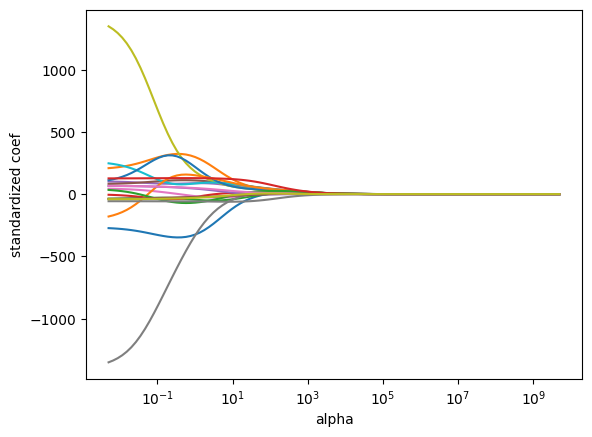

In [ ]:
ax = plt.gca() #instantiate axes
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('standardized coef')
# plt.legend(alphas)

plt.show()

In [ ]:
ridge2 = Ridge(alpha=4)
ridge2.fit(X_train_std, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test_std) # Use trained model to predict on the test␣data
print(pd.Series(ridge2.coef_, index=X_.columns)) # Print coefficients
print("\nmean_squared_error: ",mean_squared_error(y_test, pred2)) # Calculate␣the test MSE
print("\nout-of-sample R squared: ",ridge2.score(X_test_std, y_test)) 

AtBat         -210.807322
Hits           193.076932
HmRun          -51.437368
Runs             1.624070
RBI             81.458917
Walks           94.582539
Years          -28.029476
CAtBat        -117.924364
CHits           91.159632
CHmRun          91.762010
CRuns          101.115450
CRBI           117.598963
CWalks         -38.434685
PutOuts        125.556071
Assists         25.559188
Errors         -18.518904
League_N        35.792050
Division_W     -60.245442
NewLeague_N    -18.650623
dtype: float64

mean_squared_error:  104835.06228323371

out-of-sample R squared:  0.3933898793309526


If we were to make an alpha of 1000, we are going to shrink coefficients all the way to 0 giving us almost 0 R^2 as well

In [ ]:
ridge4 = Ridge(alpha=0) #simple linear regression
ridge4.fit(X_train_std, y_train) # Fit a ridge regression on the training data
pred = ridge4.predict(X_test_std) # Use this model to predict the test data
print(pd.Series(ridge4.coef_, index=X_.columns)) # Print coefficients
print("\nout-of-sample R squared: ",ridge4.score(X_test_std, y_test)) 

AtBat          -266.553048
Hits            197.706218
HmRun           -38.103182
Runs             -1.007996
RBI             103.119845
Walks            79.750209
Years            45.357697
CAtBat        -1399.811384
CHits          1426.954812
CHmRun          264.037977
CRuns            86.858781
CRBI           -211.142393
CWalks           42.533597
PutOuts         126.075563
Assists          65.816094
Errors          -38.313885
League_N         66.822855
Division_W      -56.870280
NewLeague_N     -40.962688
dtype: float64

out-of-sample R squared:  0.3212575487732783


# Cross Validation for choosing alpha vaue

In [ ]:
ridgecv = RidgeCV(alphas=alphas, scoring='r2', cv=10)
ridgecv.fit(X_train_std, y_train)
ridgecv.alpha_

201.85086292982749

In [ ]:
ridge4 = Ridge(alpha=ridgecv.alpha_) #simple linear regression
ridge4.fit(X_train_std, y_train) # Fit a ridge regression on the training data
pred = ridge4.predict(X_test_std) # Use this model to predict the test data
print(pd.Series(ridge4.coef_, index=X_.columns)) # Print coefficients
print("\nout-of-sample R squared: ",ridge4.score(X_test_std, y_test)) 

AtBat          12.522370
Hits           28.820269
HmRun           8.724359
Runs           20.205783
RBI            28.265628
Walks          34.479053
Years          12.795739
CAtBat         21.014747
CHits          28.793830
CHmRun         33.285088
CRuns          29.494924
CRBI           33.955999
CWalks         25.216139
PutOuts        55.123164
Assists        -1.678490
Errors          1.185570
League_N        5.402006
Division_W    -29.576214
NewLeague_N     4.463995
dtype: float64

out-of-sample R squared:  0.4223069835745795


# LASSO

In [ ]:
lasso = Lasso(max_iter=10000) 
coefs = []

for a in alphas:
  lasso.set_params(alpha = a)
  lasso.fit(X_train_std, y_train)
  coefs.append(lasso.coef_)

Text(0, 0.5, 'standerdized coef')

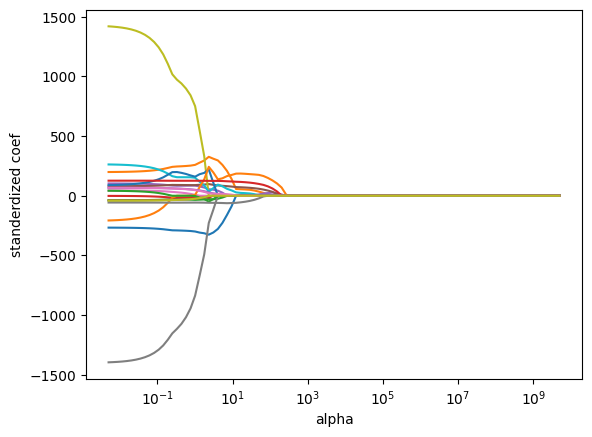

In [ ]:
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas, coefs) # graphing 19 lines over multiple alpha values
  #Didn't know you could graph that easily
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('standerdized coef')
# looks kind of similar but not quite, definitely a lot more variance

In [ ]:
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(X_train_std, y_train)
print(lassocv.score(X_test_std, y_test))
## alternatively, one can implement the follwoing
lasso1 = Lasso(max_iter=10000)
lasso1.set_params(alpha=lassocv.alpha_)
lasso1.fit(X_train_std, y_train)
print(lasso1.score(X_test_std, y_test))


0.38590698138963164
0.38590698138963164


In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lassocv.coef_, index=X_.columns) #sparse values


AtBat            0.000000
Hits            49.848096
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           66.380815
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          19.017234
CRuns            0.000000
CRBI           180.885189
CWalks           0.000000
PutOuts        109.766693
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -43.461215
NewLeague_N      0.000000
dtype: float64

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
fit3 = LogisticRegressionCV(Cs=30,random_state=1, penalty='l1',solver='saga',cv=5,max_iter = 5000).fit(X_train_std, y_train)
  #Cs is how many penalty values we want to cross validate
    #fit3.Cs_
  #penalty = 'l2' only for default solver or None penalty
    #If we want l1 penalty, we need to change the solver to be saga or liblinear

fit3.score(X_test_std, y_test)
